In [1]:
%matplotlib notebook

Idea: I want display the distance to source for different concentrations of different OSNs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import matplotlib.ticker as plticker

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent)) 
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#savepath = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig4\\DST')
savepath = 'Declare Path'
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\Behavior\\4H3O')

In [11]:
save_path = root_path

conc_to_show = ['Hex 1uM',
                'Hex 10uM',
                'Hex 100uM',
                'Hex 1mM',
                'Hex 10mM',
                'Hex 100mM',
                'Hex 500mM',
                'Hex 2000mM']
conc_in_numbers = [] # for plotting

genotype_to_show = ['Or42b SF (MS92xMS133)',
                    'w1118 (MS28)',
                    'Or42a SF (MS74xMS133)',
                    'Or1a SF (MS53xMS133)',
                   ]

colors = ['magenta',
          'green',
          'cyan',
          'blue',
          ]

markerstyle = ['.',
                "o",
               'x',
                'v']

In [12]:
all_median_dst, conc_in_numbers, all_STD_dst, all_SEM_dst, CI_high, CI_low = shared_functions.collect_median_for_dose_response(
    root_path,
    conc_to_show,
    genotype_to_show)

Folder does not exist: G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1uM\Or42b SF (MS92xMS133)
Folder does not exist: G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1uM\Or1a SF (MS53xMS133)
Folder does not exist: G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 10uM\Or1a SF (MS53xMS133)
Folder does not exist: G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 1mM\Or1a SF (MS53xMS133)
Folder does not exist: G:\My Drive\PhD\Papers\Vanishing spikes\all_data\Behavior\4H3O\Hex 500mM\Or42a SF (MS74xMS133)


<IPython.core.display.Javascript object>


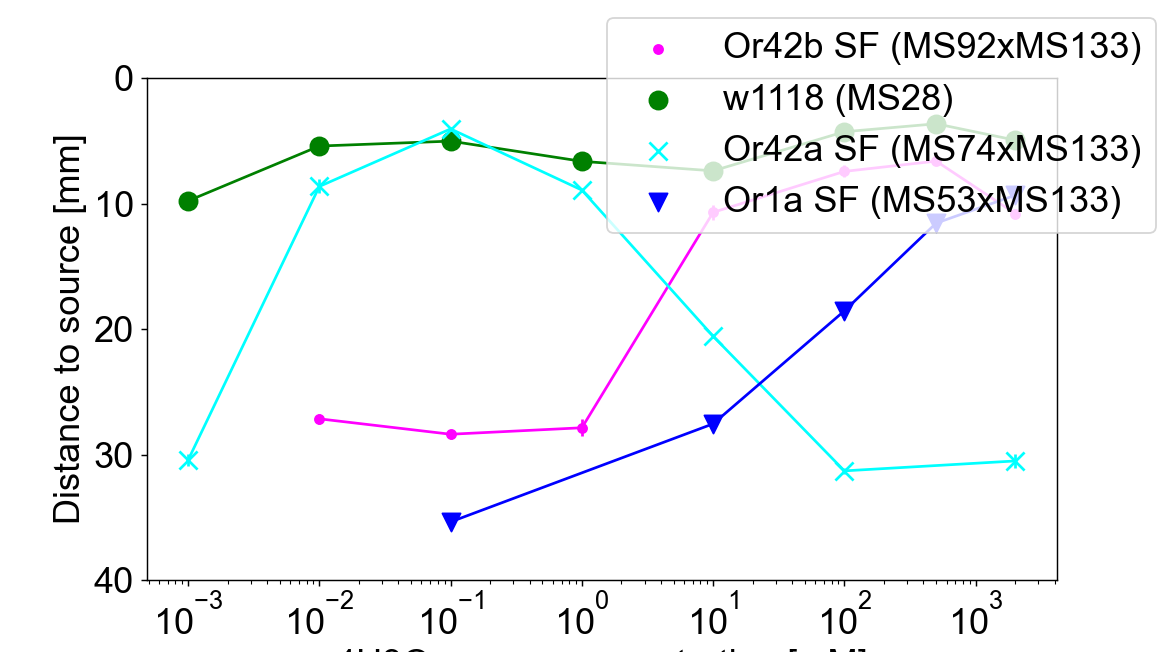

In [13]:
fig=plt.figure(figsize=(9,5))
ax=fig.add_subplot(111)
for current_genotype in range(len(genotype_to_show)):
    # since we have nan's we need to mask them to have continous plotting of lines
    mask = ~np.isnan(all_median_dst[:, current_genotype])
    ax.scatter(np.array(conc_in_numbers)[mask], all_median_dst[mask, current_genotype], 
               marker=markerstyle[current_genotype], color=colors[current_genotype], 
               label=genotype_to_show[current_genotype],
               s=100)
    ax.errorbar(np.array(conc_in_numbers)[mask],
               all_median_dst[mask, current_genotype],
               color=colors[current_genotype],
               yerr=(all_SEM_dst[mask, current_genotype]))
ax.set_xscale('log')
ax.set_xlabel('4H3O source concentration [mM]')
ax.set_ylabel('Distance to source [mm]')

loc = plticker.LogLocator(base=10.0, subs=(1,), numdecs=9, numticks=None) 
ax.xaxis.set_major_locator(loc)

ax.set_ylim(0,40)
ax.invert_yaxis()
fig.legend()

#fig.savefig(Path(savepath, 'Fig6Eiii_4Hex3One_all_DST.svg')) # uncomment to save plot

# OLD

<IPython.core.display.Javascript object>


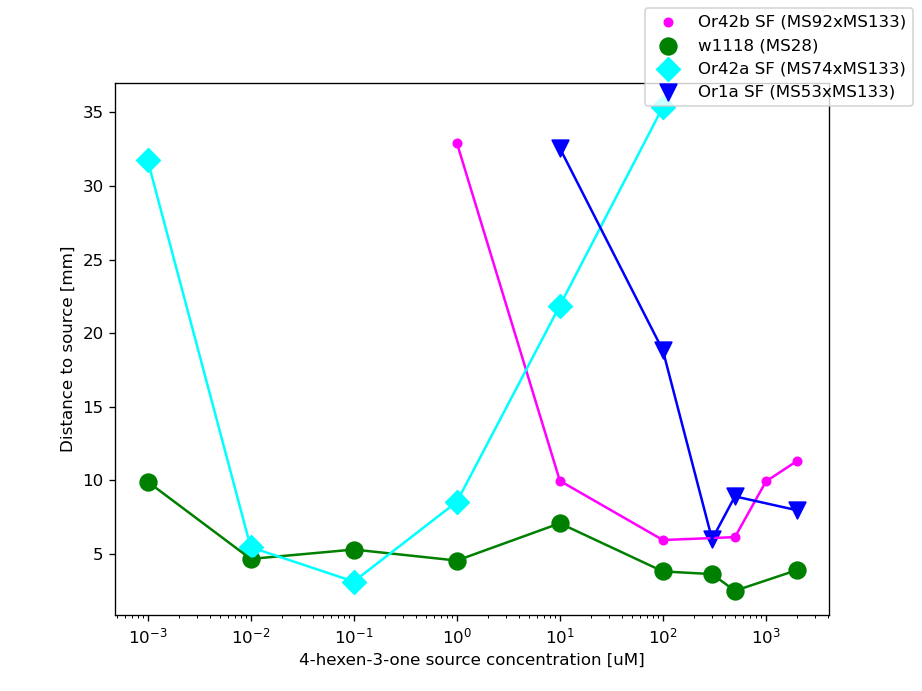

In [7]:
fig,ax = plt.subplots()
for current_genotype in range(len(genotype_to_show)):
    # since we have nan's we need to mask them to have continous plotting of lines
    mask = ~np.isnan(all_mean_dst[:, current_genotype])
    ax.plot(np.array(conc_in_numbers)[mask], 
            all_mean_dst[mask, current_genotype],
           color=colors[current_genotype])
    ax.scatter(np.array(conc_in_numbers)[mask], all_mean_dst[mask, current_genotype], 
               marker=markerstyle[current_genotype], color=colors[current_genotype], 
               label=genotype_to_show[current_genotype],
               s=100)
ax.set_xscale('log')
ax.set_xlabel('4-hexen-3-one source concentration [uM]')
ax.set_ylabel('Distance to source [mm]')
fig.legend()

fig.savefig(Path(savepath, '4Hex3One_all_DST.svg'))

# OLD

<IPython.core.display.Javascript object>


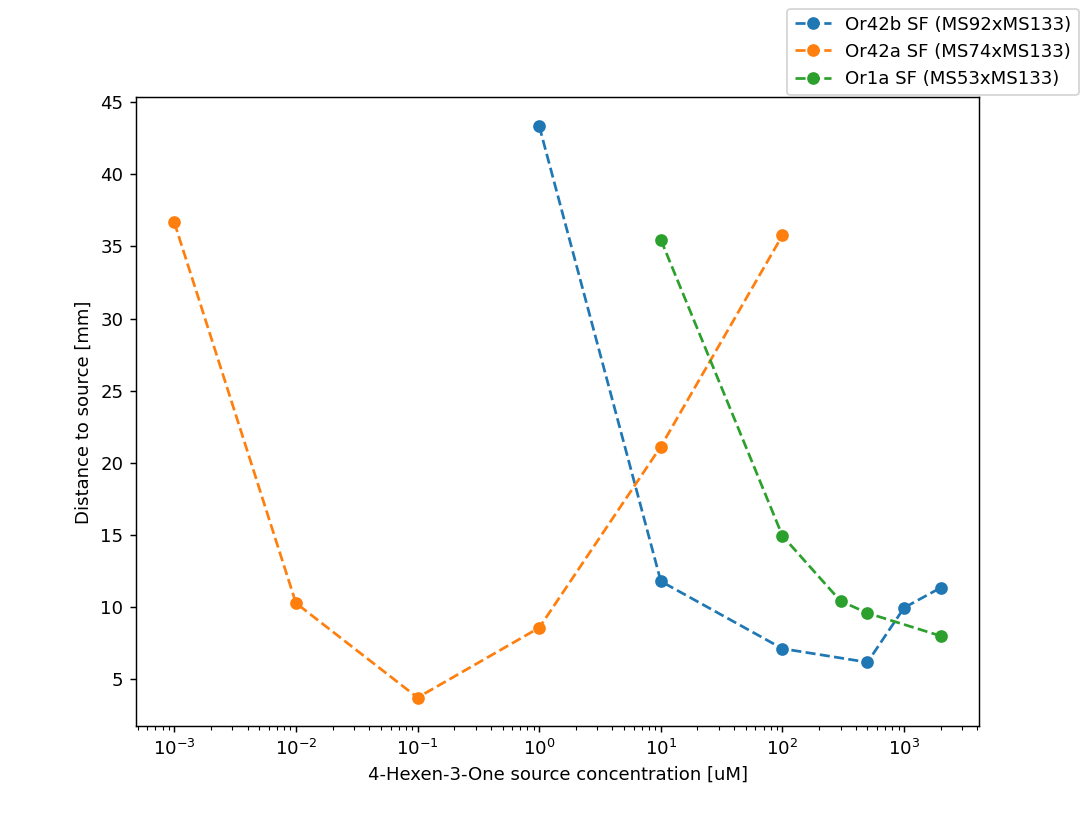

In [10]:
fig,ax = plt.subplots()
for current_genotype in range(len(genotype_to_show)):
    # since we have nan's we need to mask them to have continous plotting of lines
    mask = ~np.isnan(all_mean_dst[:, current_genotype])
    ax.plot(np.array(conc_in_numbers)[mask], 
            all_mean_dst[mask, current_genotype], '--o', label=genotype_to_show[current_genotype])
ax.set_xscale('log')
ax.set_xlabel('4-Hexen-3-One source concentration [uM]')
ax.set_ylabel('Distance to source [mm]')
fig.legend()

#fig.savefig(Path(save_path, '4Hexen3one_all_DST.png'))